# **Machine Learning - Book Recommender System Study Case**

## Import Dependencies and Load Dataset

In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
user = pd.read_csv('users_info.csv')
book = pd.read_csv('items_info.csv')
history = pd.read_csv('book_history.csv')
ratings = pd.read_csv('book_ratings.csv')

Some data rows might not be accurate because of converting error. The original data format is .dat, so it is converted to .csv with some error.

### User

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User_ID  2946 non-null   int64 
 1   City     2941 non-null   object
 2   State    1215 non-null   object
 3   Country  1219 non-null   object
 4   Age      2946 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 115.2+ KB


In [ ]:
user.shape

(2946, 5)

In [ ]:
user.head()

,User_ID,City,State,Country,Age
0,1,minneapolis,minnesota,usa,24
1,2,san diego,california,usa,20
2,3,novinger,missouri,usa,16
3,4,sonoma,california,usa,34
4,5,berkeley,california,usa,23


### Book

In [ ]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17384 entries, 0 to 17383
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Book_ID              17384 non-null  int64 
 1   ISBN                 17384 non-null  object
 2   Book-Title           17384 non-null  object
 3   Book-Author          17383 non-null  object
 4   Year-Of-Publication  17384 non-null  object
 5   Publisher            17384 non-null  object
 6   Image-URL-S          17384 non-null  object
 7   Image-URL-M          17382 non-null  object
 8   Image-URL-L          17383 non-null  object
 9   Unnamed: 9           973 non-null    object
 10  Unnamed: 10          36 non-null     object
 11  Unnamed: 11          5 non-null      object
 12  Unnamed: 12          1 non-null      object
dtypes: int64(1), object(12)
memory usage: 1.7+ MB


In [ ]:
book.shape

(17384, 13)

In [ ]:
book.head()

,Book_ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,NaN,NaN,NaN,NaN
1,2,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp,Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,NaN,NaN,NaN
2,3,425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,NaN,NaN,NaN,NaN
3,4,452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,NaN,NaN,NaN,NaN
4,5,609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...,NaN,NaN,NaN,NaN


### History

In [ ]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272678 entries, 0 to 272677
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user      272678 non-null  int64
 1   item      272678 non-null  int64
 2   accessed  272678 non-null  int64
dtypes: int64(3)
memory usage: 6.2 MB


In [ ]:
history.shape

(272678, 3)

In [ ]:
history.head()

,user,item,accessed
0,1,152,1
1,1,153,1
2,1,2176,1
3,1,154,1
4,1,734,1


### Ratings

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62656 entries, 0 to 62655
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   user    62656 non-null  int64
 1   item    62656 non-null  int64
 2   rating  62656 non-null  int64
dtypes: int64(3)
memory usage: 1.4 MB


In [ ]:
ratings.shape

(62656, 3)

In [ ]:
ratings.head()

,user,item,rating
0,1,6264,7
1,1,4350,7
2,1,6252,5
3,1,202,9
4,1,6266,6


## Data Cleaning

### User

In [ ]:
# Mengecek missing value pada dataframe user
user.isnull().sum()

User_ID       0
City          5
State      1731
Country    1727
Age           0
dtype: int64

Tidak dilakukan penghapusan data null karena tidak berpengaruh pada proses machine learning. Data domisili hanya akan digunakan untuk melihat distribusi pembaca.

In [ ]:
# Nilai statistik dari usia pembaca
user['Age'].describe()

count    2946.000000
mean       36.214528
std        13.995226
min         1.000000
25%        27.000000
50%        34.000000
75%        43.000000
max       239.000000
Name: Age, dtype: float64

In [ ]:
# Menghapus data dengan usia diatas 100 karena outlier/potensi salah input
user = user.query('Age < 100')

In [ ]:
# Mengecek kembali nilai statistik dari usia pembaca
user['Age'].describe()

count    2934.000000
mean       35.775733
std        11.852032
min         1.000000
25%        27.000000
50%        34.000000
75%        43.000000
max        90.000000
Name: Age, dtype: float64

### History

In [ ]:
# Mengecek missing value pada dataframe history
history.isnull().sum()

user        0
item        0
accessed    0
dtype: int64

### Ratings

In [ ]:
# Mengubah nama kolom 'item' menjadi 'Book_ID'
ratings = ratings.rename(columns={'item': 'Book_ID'})

In [ ]:
# Mengecek missing value pada dataframe ratings
ratings.isnull().sum()

user       0
Book_ID    0
rating     0
dtype: int64

### Book

In [ ]:
# Mengecek missing value pada dataframe book
book.isnull().sum()

Book_ID                    0
ISBN                       0
Book-Title                 0
Book-Author                1
Year-Of-Publication        0
Publisher                  0
Image-URL-S                0
Image-URL-M                2
Image-URL-L                1
Unnamed: 9             16411
Unnamed: 10            17348
Unnamed: 11            17379
Unnamed: 12            17383
dtype: int64

In [ ]:
# Menghapus kolom tidak terpakai
columns = ['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
book_clean = book.drop(columns, axis=1)

In [ ]:
# Membersihkan missing value dengan fungsi dropna()
book_clean = book_clean.dropna()
book_clean

,Book_ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,1,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
1,2,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp
2,3,425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group
3,4,452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume
4,5,609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press
...,...,...,...,...,...,...
17379,17380,449209202,Guide to Confident Living,Norman Vincent Peale,1985,Fawcett Books
17380,17381,2209014026,Ludwig Feuerbach,F. Engels,1976,La Dispute
17381,17382,070892722X,To Bring You Joy (Ulverscroft Large Print Series),Essie Summers,1992,Ulverscroft Large Print
17382,17383,1570031843,Like Unto Like: A Novel (Southern Classics Ser...,Katherine Sherwood Bonner McDowell,1997,University of South Carolina Press


In [ ]:
# Mengecek missing value pada dataframe book
book_clean.isnull().sum()

Book_ID                0
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

## Exploratory Data Analysis

### Readers Demography

#### City

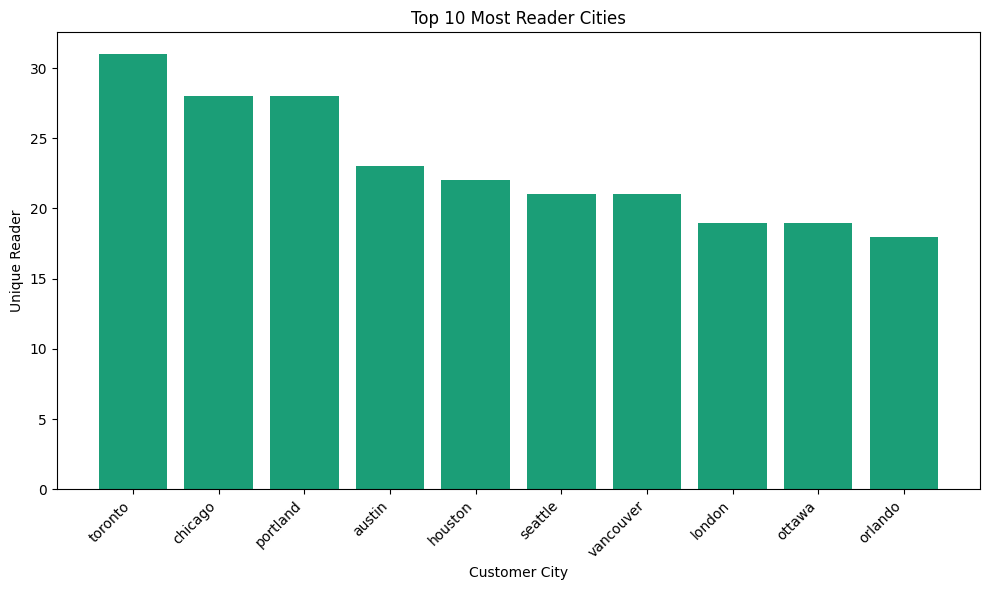

In [ ]:
# Count readers in each city
user_city= user.groupby('City')['User_ID'].count().reset_index()

# 10 cities with the most readers (origin city)
top_10_cities = user_city.nlargest(10, 'User_ID')

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['City'], top_10_cities['User_ID'])

plt.xlabel('Customer City')
plt.ylabel('Unique Reader')
plt.title('Top 10 Most Reader Cities')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

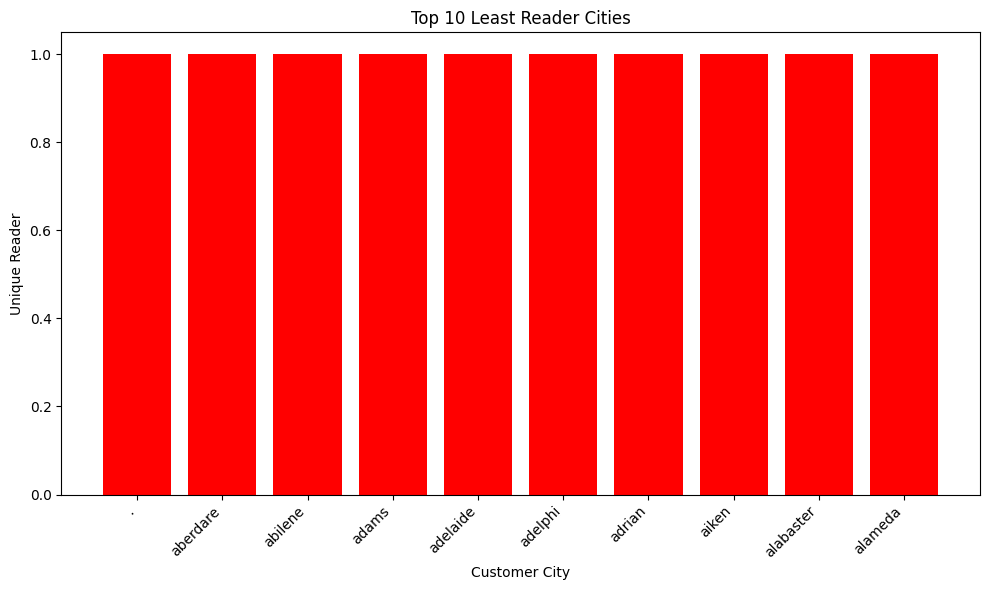

In [ ]:
# 10 cities with the least readers (origin city)
top_10_cities = user_city.nsmallest(10, 'User_ID')

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['City'], top_10_cities['User_ID'], color='red')

plt.xlabel('Customer City')
plt.ylabel('Unique Reader')
plt.title('Top 10 Least Reader Cities')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### State

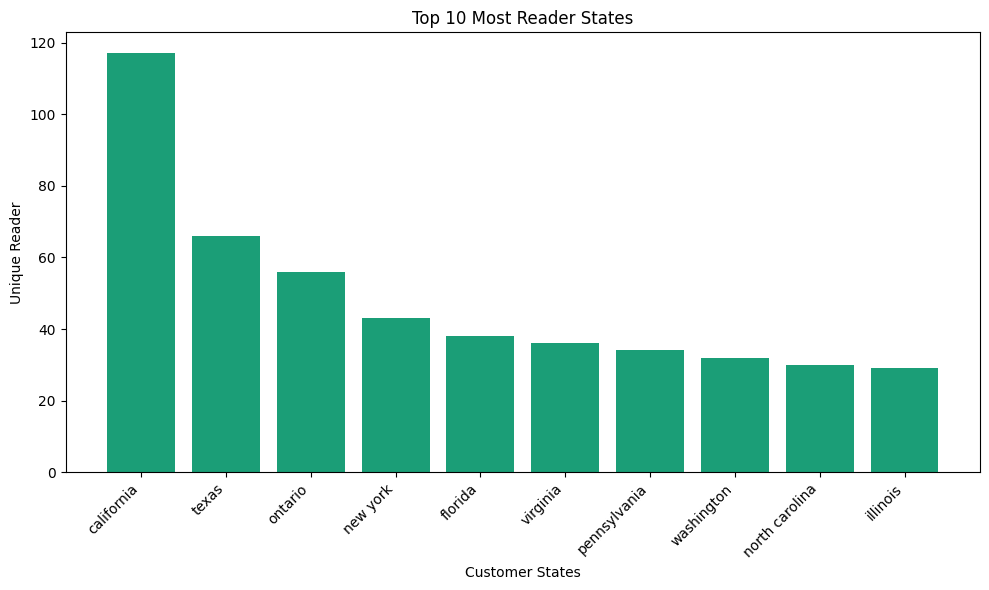

In [ ]:
# Count readers in each state
user_states = user.groupby('State')['User_ID'].count().reset_index()

# 10 states with the most readers (origin states)
top_10_states = user_states.nlargest(10, 'User_ID')

plt.figure(figsize=(10, 6))
plt.bar(top_10_states['State'], top_10_states['User_ID'])

plt.xlabel('Customer States')
plt.ylabel('Unique Reader')
plt.title('Top 10 Most Reader States')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

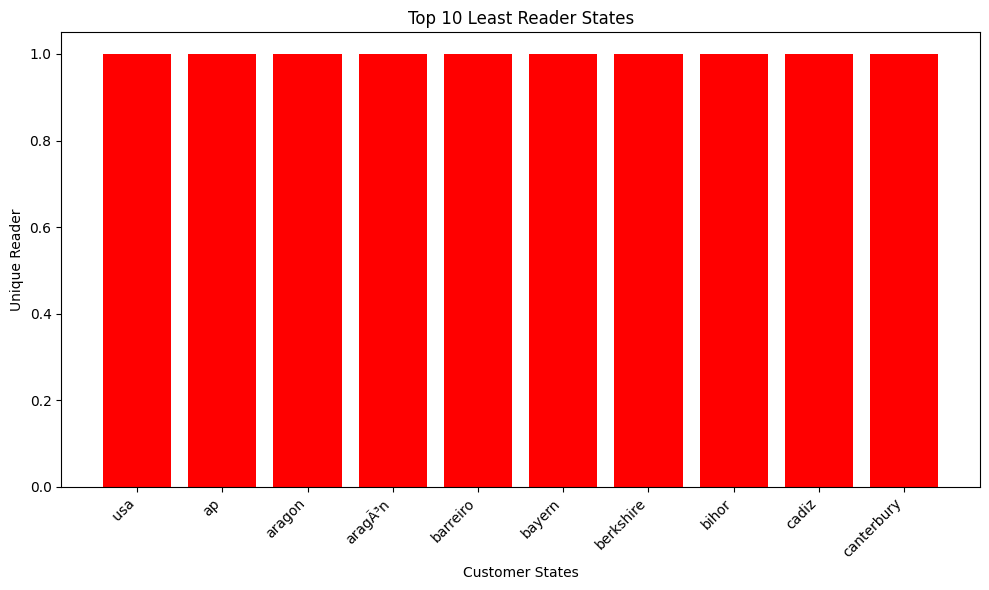

In [ ]:
# 10 states with the least readers (origin states)
top_10_states = user_states.nsmallest(10, 'User_ID')

plt.figure(figsize=(10, 6))
plt.bar(top_10_states['State'], top_10_states['User_ID'], color='red')

plt.xlabel('Customer States')
plt.ylabel('Unique Reader')
plt.title('Top 10 Least Reader States')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Country

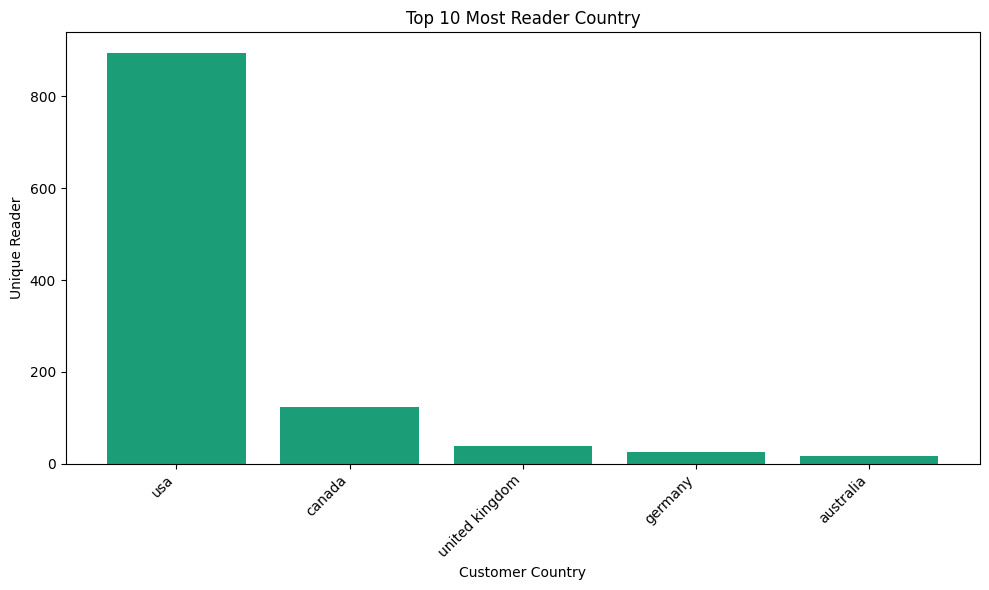

In [ ]:
# Count readers in each country
user_country = user.groupby('Country')['User_ID'].count().reset_index()

# 10 country with the most readers (origin country)
top_10_country = user_country.nlargest(5, 'User_ID')

plt.figure(figsize=(10, 6))
plt.bar(top_10_country['Country'], top_10_country['User_ID'])

plt.xlabel('Customer Country')
plt.ylabel('Unique Reader')
plt.title('Top 10 Most Reader Country')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

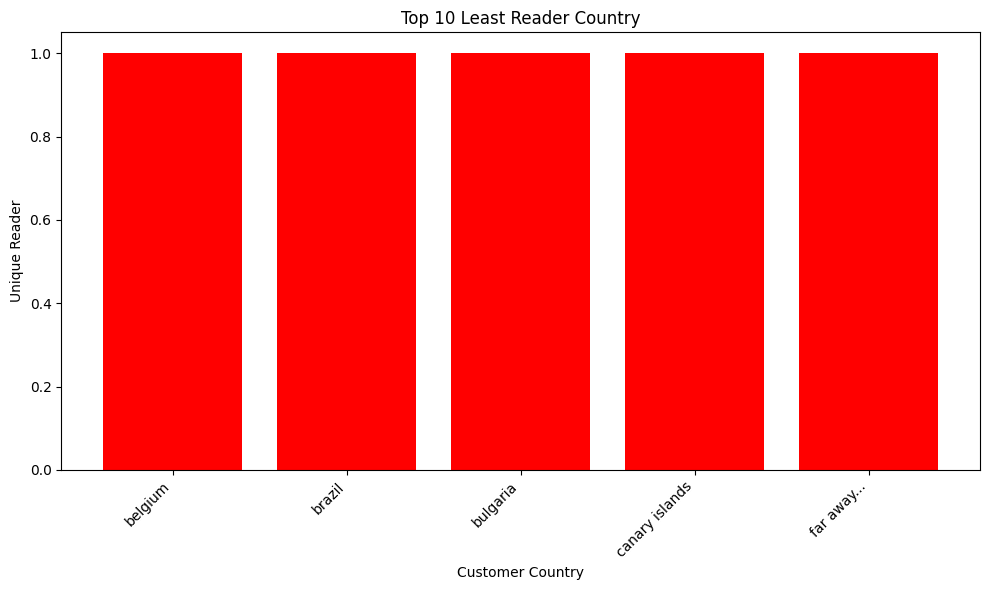

In [ ]:
# 10 country with the least readers (origin country)
top_10_country = user_country.nsmallest(5, 'User_ID')

plt.figure(figsize=(10, 6))
plt.bar(top_10_country['Country'], top_10_country['User_ID'], color='red')

plt.xlabel('Customer Country')
plt.ylabel('Unique Reader')
plt.title('Top 10 Least Reader Country')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Age

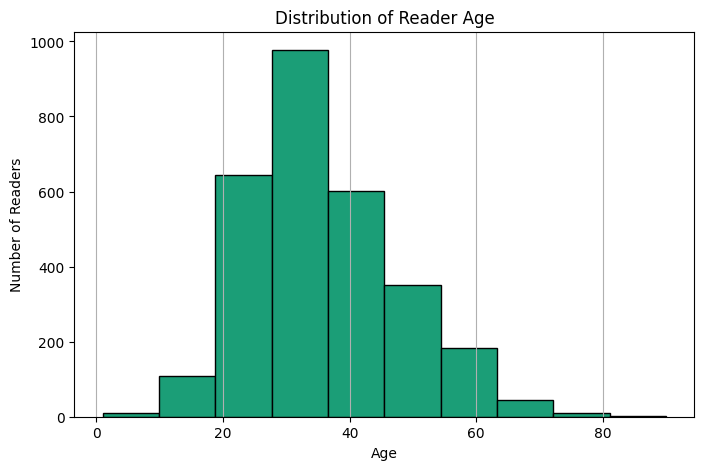

In [ ]:
# Select the 'age' column
age_data = user['Age']

# Create the histogram
plt.figure(figsize=(8, 5))
age_data.hist(edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Readers')
plt.title('Distribution of Reader Age')
plt.grid(axis='y')
plt.show()

### Active and Inactive Readers

In [ ]:
# Create user_id list in df
user_id_list = history['user'].tolist()

# Reader is active if User_ID is in history
user["status"] = np.where(user["User_ID"].isin(user_id_list), "Active", "Non Active")

print(user.sample(5))

      User_ID       City     State Country  Age  status
1443     1444    medford       NaN     NaN   46  Active
633       634   longmont  colorado     usa   28  Active
871       872  lexington  kentucky     usa   31  Active
2511     2512  pineville       NaN     NaN   24  Active
1608     1609       york       NaN     NaN   33  Active


In [ ]:
# Count the number of active and inactive readers
user.groupby(by="status").User_ID.count()

status
Active    2934
Name: User_ID, dtype: int64

### Readers Who Reads the Most

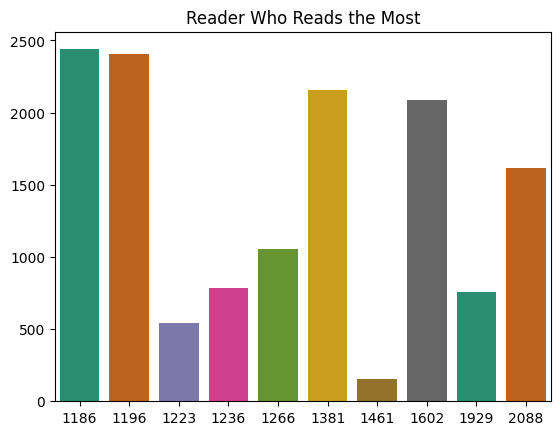

<Figure size 1000x2000 with 0 Axes>

In [ ]:
#Univariate analysis to see which reader read most often
data_plot  = history['user'].value_counts()[:10].to_list()
label_plot = history['user'].value_counts()[:10].index.to_list()

title = 'Reader Who Reads the Most'

plot       = sns.barplot(x = data_plot, y = label_plot, palette = 'Dark2')
plot_title = plt.title(title)

fig = plt.figure(figsize=(10, 20))
plt.show()

### Authors and Their Books

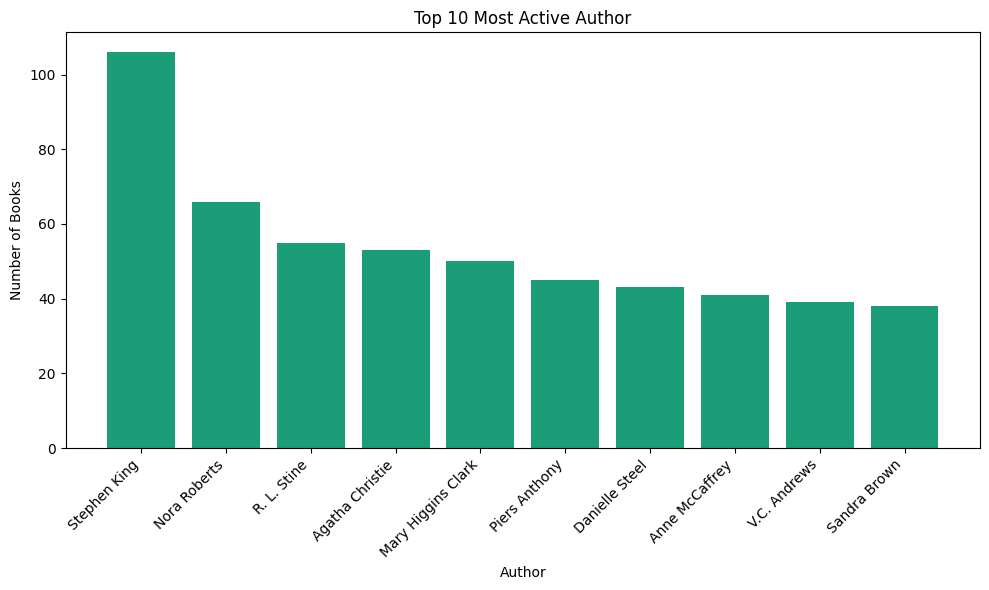

In [ ]:
# Count books by each authors
book_author = book.groupby('Book-Author')['Book_ID'].count().reset_index()

# 10 author with most books
top_10_author = book_author.nlargest(10, 'Book_ID')

plt.figure(figsize=(10, 6))
plt.bar(top_10_author['Book-Author'], top_10_author['Book_ID'])

plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('Top 10 Most Active Author')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Publishers and Books They Published

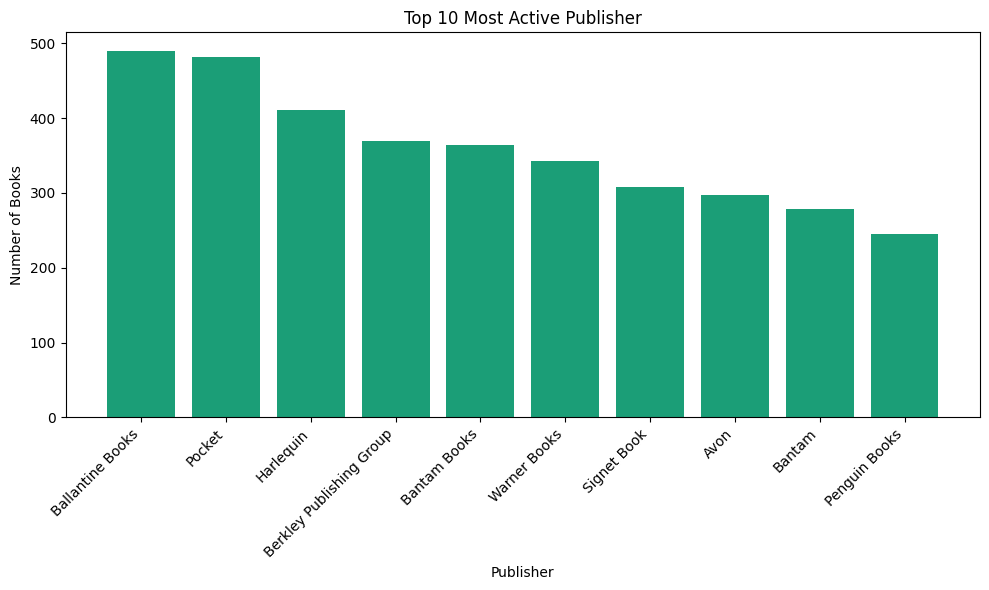

In [ ]:
# Count books by each publihsers
book_publisher = book.groupby('Publisher')['Book_ID'].count().reset_index()

# 10 author with most books
top_10_publisher = book_publisher.nlargest(10, 'Book_ID')

plt.figure(figsize=(10, 6))
plt.bar(top_10_publisher['Publisher'], top_10_publisher['Book_ID'])

plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.title('Top 10 Most Active Publisher')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Content-based Filtering

In [ ]:
# Mengurutkan book berdasarkan id kemudian memasukkannya ke dalam variabel book_order
book_order = book_clean.sort_values('Book_ID', ascending=True)
book_order

,Book_ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,1,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
1,2,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp
2,3,425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group
3,4,452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume
4,5,609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press
...,...,...,...,...,...,...
17379,17380,449209202,Guide to Confident Living,Norman Vincent Peale,1985,Fawcett Books
17380,17381,2209014026,Ludwig Feuerbach,F. Engels,1976,La Dispute
17381,17382,070892722X,To Bring You Joy (Ulverscroft Large Print Series),Essie Summers,1992,Ulverscroft Large Print
17382,17383,1570031843,Like Unto Like: A Novel (Southern Classics Ser...,Katherine Sherwood Bonner McDowell,1997,University of South Carolina Press


In [ ]:
# Mengecek berapa jumlah book_order
len(book_order.Book_ID.unique())

17383

In [ ]:
# Mengonversi data series ‘id’ menjadi dalam bentuk list
book_id = book_order['Book_ID'].tolist()

# Mengonversi data series ‘title’ menjadi dalam bentuk list
book_title = book_order['Book-Title'].tolist()

# Mengonversi data series ‘author’ menjadi dalam bentuk list
book_author = book_order['Book-Author'].tolist()

print(len(book_id))
print(len(book_title))
print(len(book_author))

17383
17383
17383


In [ ]:
# Membuat dictionary untuk data
book_new = pd.DataFrame({
    'id': book_id,
    'title': book_title,
    'author': book_author,
})

book_new

,id,title,author
0,1,Decision in Normandy,Carlo D'Este
1,2,The Mummies of Urumchi,E. J. W. Barber
2,3,What If?: The World's Foremost Military Histor...,Robert Cowley
3,4,Beloved (Plume Contemporary Fiction),Toni Morrison
4,5,Our Dumb Century: The Onion Presents 100 Years...,The Onion
...,...,...,...
17378,17380,Guide to Confident Living,Norman Vincent Peale
17379,17381,Ludwig Feuerbach,F. Engels
17380,17382,To Bring You Joy (Ulverscroft Large Print Series),Essie Summers
17381,17383,Like Unto Like: A Novel (Southern Classics Ser...,Katherine Sherwood Bonner McDowell


In [ ]:
data = book_new
data.sample(5)

,id,title,author
13850,13852,Mama Gena's Owner's and Operator's Guide to Men,Regena Thomashauer
16950,16952,Titans,John Jakes
6250,6251,Love Always Remembers: A Book of Poems,Joan Walsh Anglund
16038,16040,Why Call Them Back From Heaven,C.D. Simak
13295,13296,Motton: Plays Three,Gregory Motton


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data author
tf.fit(data['author'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['10', '101', '1024', ..., 'ñfin', 'ñmer', 'ñrtin'], dtype=object)

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['author'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(17383, 8486)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan author buku
# Baris diisi dengan judul buku

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.title
).sample(22, axis=1).sample(10, axis=0)

,litton,modiano,nic,greta,lafferty,paz,lindskold,robie,pacotti,gwendolen,...,ryszard,praagh,burroughs,kur,juilene,steinberg,kidder,count,marya,latham
title,,,,,,,,,,,,,,,,,,,,,
White Fang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
One Man's Poison (One Man's Poison),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fabulous Nobodies: A Novel About a Girl Who's in Love With Her Clothes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
McNally's Secret (Archy McNally Novels (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
My Left Foot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spook,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Scavenger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Perfect Machine: Building the Palomar Telescope,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The automotive history of Lucky Kellerman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (17383, 17383)


title,House On Olive Street,The Lad and the Lion,Mr. Perfect,Up Country: A Novel,Cerebro
title,,,,,
Say You're Mine,0.0,0.0,0.0,0.0,0.0
Wishbone Classic #11 Adv of Tom Sawyer (Wishbone),0.0,0.0,0.0,0.0,0.0
Canadian Ghost Stories,0.0,0.0,0.0,0.0,0.0
Little Drummer Girl,0.0,0.0,0.0,0.0,0.0
Home Baking,0.0,0.0,0.0,0.0,0.0
The Grass Dancer,0.0,0.0,0.0,0.0,0.0
Putting God in His Place,0.0,0.0,0.0,0.0,0.0
Second Foundation (Foundation Novels (Paperback)),0.0,0.0,0.0,0.0,0.0
"Pawn of Prophecy (The Belgariad, Book 1)",0.0,0.0,0.0,0.0,0.0


In [ ]:
def book_recommendations(title, similarity_data=cosine_sim_df, items=data[['title', 'author']], k=5):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop title agar nama buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
# Get user input for the book title
search_name = input("Enter the book title you want to search: ")

# Filter the DataFrame based on the input name
filtered_data = data[data.title.eq(search_name)]
# Misalnya: Family Album

# Display the results
filtered_data

Enter the book title you want to search: Family Album


,id,title,author
6819,6820,Family Album,Danielle Steel
7384,7385,Family Album,Patricia Kay


In [ ]:
# Get user input for the book name
search_name = input("Enter the book title you want to search: ")

# Filter the DataFrame based on the input name
rec = book_recommendations(search_name)
# Misalnya: The Blessing Stone

# Display the results
rec

Enter the book title you want to search: The Blessing Stone


,title,author
0,Virgins of Paradise,Barbara Wood
1,Perfect Harmony,Barbara Wood
2,Bajo El Sol de Kenia,Barbara Wood
3,Dreaming,Barbara Wood
4,Dreaming,Jill Barnett


## Collaborative Filtering

In [ ]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
# Membaca dataset
df = ratings
df

,user,Book_ID,rating
0,1,6264,7
1,1,4350,7
2,1,6252,5
3,1,202,9
4,1,6266,6
...,...,...,...
62651,2945,15719,8
62652,2945,11960,6
62653,2945,8515,9
62654,2945,9417,7


In [ ]:
# Mengubah user ID menjadi list tanpa nilai yang sama
user_ids = df['user'].unique().tolist()
print('list user ID: ', user_ids)

# Melakukan encoding user ID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user ID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke user ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user ID: ', user_encoded_to_user)

list user ID:  [1, 2, 5, 7, 9, 11, 14, 16, 18, 20, 22, 24, 25, 26, 29, 31, 34, 44, 47, 48, 49, 52, 53, 57, 59, 60, 63, 69, 71, 73, 76, 78, 83, 90, 92, 93, 94, 99, 101, 103, 105, 109, 110, 113, 115, 118, 120, 121, 123, 124, 125, 131, 136, 137, 138, 140, 145, 152, 153, 154, 155, 157, 158, 162, 164, 167, 169, 170, 173, 175, 177, 180, 181, 182, 186, 187, 188, 190, 191, 192, 193, 194, 195, 200, 201, 202, 203, 204, 205, 208, 209, 211, 213, 217, 218, 222, 225, 232, 234, 235, 243, 245, 246, 247, 248, 252, 253, 255, 257, 258, 259, 266, 267, 268, 271, 273, 275, 276, 279, 282, 290, 295, 297, 299, 301, 310, 311, 312, 313, 314, 318, 321, 322, 323, 325, 334, 335, 337, 339, 340, 341, 342, 343, 345, 346, 349, 350, 351, 353, 354, 355, 356, 358, 364, 366, 367, 369, 372, 376, 377, 383, 384, 385, 386, 388, 391, 392, 394, 396, 400, 401, 403, 405, 411, 415, 416, 418, 421, 425, 427, 428, 429, 431, 432, 437, 438, 439, 441, 444, 447, 448, 449, 450, 457, 460, 464, 465, 468, 471, 473, 474, 476, 477, 487, 489, 49

In [ ]:
# Mengubah book ID menjadi list tanpa nilai yang sama
book_ids = df['Book_ID'].unique().tolist()

# Melakukan proses encoding book ID
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}

# Melakukan proses encoding angka ke book ID
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

In [ ]:
# Mapping user ID ke dataframe user
df['user'] = df['user'].map(user_to_user_encoded)

# Mapping book ID ke dataframe book_id
df['Book_ID'] = df['Book_ID'].map(book_to_book_encoded)

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah buku
num_book = len(book_encoded_to_book)
print(num_book)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

1295
14684
Number of User: 1295, Number of Book: 14684, Min Rating: 1.0, Max Rating: 10.0


In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,user,Book_ID,rating
24878,501,10447,7.0
849,19,791,10.0
30937,618,9109,7.0
20691,434,8363,6.0
14971,315,514,7.0
...,...,...,...
62570,1292,7698,8.0
38158,777,678,8.0
860,19,798,7.0
15795,333,8022,8.0


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = df[['user', 'Book_ID']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[  501 10447]
 [   19   791]
 [  618  9109]
 ...
 [   19   798]
 [  333  8022]
 [ 1165  1691]] [0.66666667 1.         0.66666667 ... 0.66666667 0.77777778 0.44444444]


In [ ]:
class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_book, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_book = num_book
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.book_embedding = layers.Embedding(
            num_book,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.book_bias = layers.Embedding(num_book, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias = self.book_bias(inputs[:, 1])
        dot_user_book = tf.tensordot(user_vector, book_vector, 2)
        # Add all the components (including bias)
        x = dot_user_book + user_bias + book_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)

In [ ]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 10, #bisa dilebihkan, sebagai contoh hanya dilakukan 10 kali epochs untuk mempersingkat waktu pelatihan
    validation_data = (x_val, y_val)
)

Epoch 1/10
6266/6266 [==============================] - 73s 11ms/step - loss: 0.5993 - root_mean_squared_error: 0.2557 - val_loss: 0.5338 - val_root_mean_squared_error: 0.1867
Epoch 2/10
6266/6266 [==============================] - 74s 12ms/step - loss: 0.5219 - root_mean_squared_error: 0.1751 - val_loss: 0.5311 - val_root_mean_squared_error: 0.1845
Epoch 3/10
6266/6266 [==============================] - 71s 11ms/step - loss: 0.5138 - root_mean_squared_error: 0.1666 - val_loss: 0.5264 - val_root_mean_squared_error: 0.1798
Epoch 4/10
6266/6266 [==============================] - 72s 11ms/step - loss: 0.5089 - root_mean_squared_error: 0.1617 - val_loss: 0.5255 - val_root_mean_squared_error: 0.1794
Epoch 5/10
6266/6266 [==============================] - 72s 11ms/step - loss: 0.5060 - root_mean_squared_error: 0.1589 - val_loss: 0.5229 - val_root_mean_squared_error: 0.1768
Epoch 6/10
6266/6266 [==============================] - 70s 11ms/step - loss: 0.5031 - root_mean_squared_error: 0.1557 -

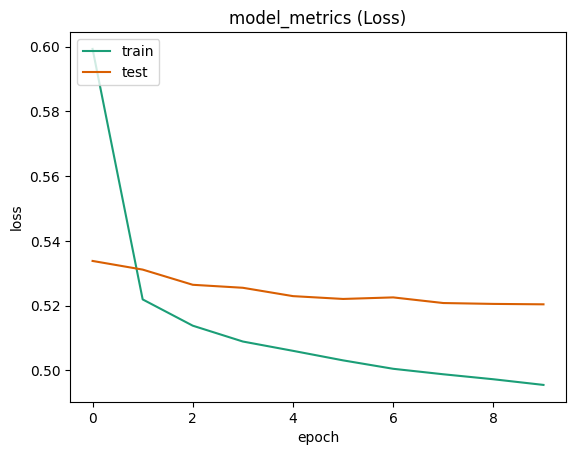

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_metrics (Loss)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

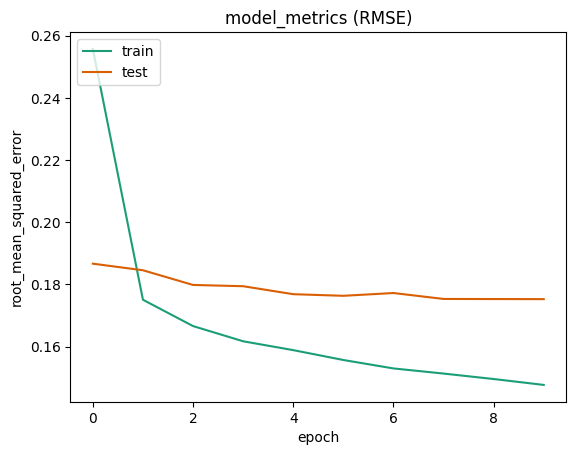

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics (RMSE)')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
book_df = book_new

# Mengambil sample user
user_id = df.user.sample(11).iloc[0]
book_read_by_user = df[df.user == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
book_not_read = book_df[~book_df['id'].isin(book_read_by_user.Book_ID.values)]['id']
book_not_read = list(
    set(book_not_read)
    .intersection(set(book_to_book_encoded.keys()))
)

book_not_read = [[book_to_book_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

In [ ]:
rating = model.predict(user_book_array).flatten()

top_ratings_indices = rating.argsort()[-10:][::-1]
recommended_book_ids = [
    book_to_book_encoded.get(book_not_read[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)

top_book_user = (
    book_read_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .Book_ID.values
)

book_df_rows = book_df[book_df['id'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.title, ':', row.author)

print('----' * 8)
print('Top 10 Book Recommendation')
print('----' * 8)

recommended_book = book_df[book_df['id'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.title, ':', row.author)

458/458 [==============================] - 1s 1ms/step
Showing recommendations for users: 432
Book with high ratings from user
--------------------------------
Walk Two Moons : Sharon Creech
Wuthering Heights (Wordsworth Classics) : Emily Bronte
This Day All Gods Die: The Gap into Ruin (Gap Series/Stephen R. Donaldson) : Stephen R. Donaldson
Visible Heart (Silhouette Romances #275) : Dixie Browning
Heaven's Price : Sandra Brown
--------------------------------
Top 10 Book Recommendation
--------------------------------
The Body Farm : Patricia Daniels Cornwell
The Secret (Animorphs, No 9) : Katherine Applegate
Heir to the Shadows (The Black Jewels Trilogy, Book 2) : Anne Bishop
Si c'est un homme : Primo Levi
The Last of the Wine : Mary Renault
SIVANANDA COMPANION TO YOGA : Lucy. Lidell
Blues Lessons: A Novel : Robert Hellenga
The Beaver Papers: The Story of the Lost Season : Will Jacobs
Understanding Power: The Indispensable Chomsky : Noam Chomsky
